# Convolutional Neural Networks

# Importar Librerías

In [1]:
import cv2 

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Set de Imágenes

In [4]:
dirname = os.path.join(os.getcwd(), 'imagenes/situaciones_de_riesgo28x28')
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  D:\Users\axelv\Documents\ITM\Semestre_9\IA\actividad_4\imagenes/situaciones_de_riesgo28x28\
D:\Users\axelv\Documents\ITM\Semestre_9\IA\actividad_4\imagenes/situaciones_de_riesgo28x28\Asalto 1
D:\Users\axelv\Documents\ITM\Semestre_9\IA\actividad_4\imagenes/situaciones_de_riesgo28x28\Incendio 5240
D:\Users\axelv\Documents\ITM\Semestre_9\IA\actividad_4\imagenes/situaciones_de_riesgo28x28\Inundacion 5240
D:\Users\axelv\Documents\ITM\Semestre_9\IA\actividad_4\imagenes/situaciones_de_riesgo28x28\Robo_casa_habitacion 5240
D:\Users\axelv\Documents\ITM\Semestre_9\IA\actividad_4\imagenes/situaciones_de_riesgo28x28\Tornado 5240
Directorios leidos: 5
Imagenes en cada directorio [5241, 5240, 5240, 5240, 5239]
suma Total de imagenes en subdirs: 26200


# Creacion de las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  26200


In [6]:
situaciones=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    situaciones.append(name[len(name)-1])
    indice=indice+1

0 Asalto
1 Incendio
2 Inundacion
3 Robo_casa_habitacion
4 Tornado


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Numero total de salidas outputs : ', nClasses)
print('Output classes : ', classes)

Numero total de salidas outputs :  5
Output classes :  [0 1 2 3 4]


# Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (20960, 28, 28, 3) (20960,)
Testing data shape :  (5240, 28, 28, 3) (5240,)


Text(0.5, 1.0, 'Ground Truth : 0')

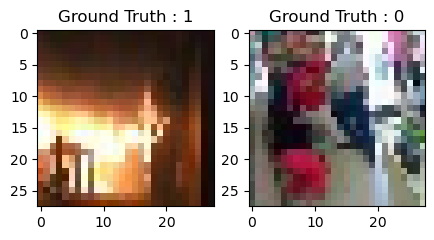

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

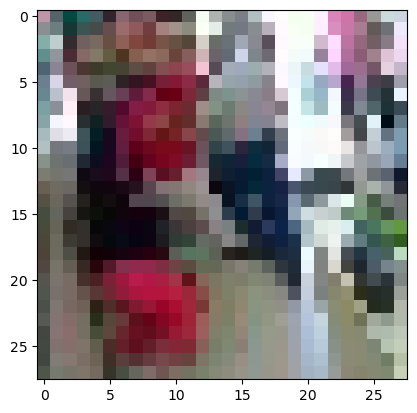

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(16768, 28, 28, 3) (4192, 28, 28, 3) (16768, 5) (4192, 5)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
#from keras.models import Sequential
#from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU, Input

sport_model = Sequential()
#sport_model.add(Input(shape=(21, 28, 3)))  # Add Input layer with the specified input shape
sport_model.add(Input(shape=(28, 28, 3)))  # Add Input layer with the specified input shape
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
#sport_model.add(LeakyReLU(negative_slope=0.1))
sport_model.add(LeakyReLU(alpha=0.1)) # Replace alpha with negative_slope
sport_model.add(MaxPooling2D((2, 2), padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
#sport_model.add(LeakyReLU(negative_slope=0.1))
sport_model.add(LeakyReLU(alpha=0.1)) # Replace alpha with negative_slope
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))


In [16]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                        

In [17]:
#OLD1 #sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
#OLD2 #sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100), metrics=['accuracy'])
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR), metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
262/262 [==============================] - 6s 5ms/step - loss: 1.5829 - accuracy: 0.2518 - val_loss: 1.4975 - val_accuracy: 0.3569
Epoch 2/20
262/262 [==============================] - 1s 4ms/step - loss: 1.4841 - accuracy: 0.3569 - val_loss: 1.3698 - val_accuracy: 0.5823
Epoch 3/20
262/262 [==============================] - 1s 4ms/step - loss: 1.3742 - accuracy: 0.4566 - val_loss: 1.2073 - val_accuracy: 0.7483
Epoch 4/20
262/262 [==============================] - 1s 4ms/step - loss: 1.2516 - accuracy: 0.5358 - val_loss: 1.0535 - val_accuracy: 0.7765
Epoch 5/20
262/262 [==============================] - 1s 4ms/step - loss: 1.1377 - accuracy: 0.5958 - val_loss: 0.9179 - val_accuracy: 0.7989
Epoch 6/20
262/262 [==============================] - 1s 4ms/step - loss: 1.0291 - accuracy: 0.6390 - val_loss: 0.8048 - val_accuracy: 0.8290
Epoch 7/20
262/262 [==============================] - 1s 4ms/step - loss: 0.9473 - accuracy: 0.6663 - val_loss: 0.7227 - val_accuracy: 0.8662
Epoch 

In [19]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
#sport_model.save(r"C:\Users\rovega\Desktop\ITM\Sem 9\Inteligencia Artificial\IA - Actividades NO GIT\Convolucion\CodigoSportImages\Red Neuronal Entrenada\entrenadita.h5")

# Save the model in the native Keras format
sport_model.save('./CNN/entrenadita_tf-oficial_riesgos.keras')
sport_model.save('./CNN/entrenadita_tf-oficial_riesgos.h5')


# Evaluación de la red

In [20]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

164/164 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.9023


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.37134894728660583
Test accuracy: 0.9022901058197021


In [22]:
sport_train.history

{'loss': [1.5828900337219238,
  1.4841108322143555,
  1.3741941452026367,
  1.2516241073608398,
  1.1376960277557373,
  1.0291450023651123,
  0.9473176002502441,
  0.8760652542114258,
  0.8226351737976074,
  0.7797783017158508,
  0.732074499130249,
  0.7032411694526672,
  0.6701520085334778,
  0.6486245393753052,
  0.6200647354125977,
  0.5981597304344177,
  0.5781102180480957,
  0.561362087726593,
  0.5530375242233276,
  0.5312126874923706],
 'accuracy': [0.2517891228199005,
  0.35692986845970154,
  0.45664361119270325,
  0.5358420610427856,
  0.595777690410614,
  0.6390147805213928,
  0.666269063949585,
  0.6976979970932007,
  0.7153506875038147,
  0.7334207892417908,
  0.7536379098892212,
  0.7668177485466003,
  0.7778506875038147,
  0.7848879098892212,
  0.8015863299369812,
  0.8115457892417908,
  0.8192390203475952,
  0.8202528357505798,
  0.8263359069824219,
  0.8393368124961853],
 'val_loss': [1.4974690675735474,
  1.3697513341903687,
  1.2073382139205933,
  1.0534909963607788,


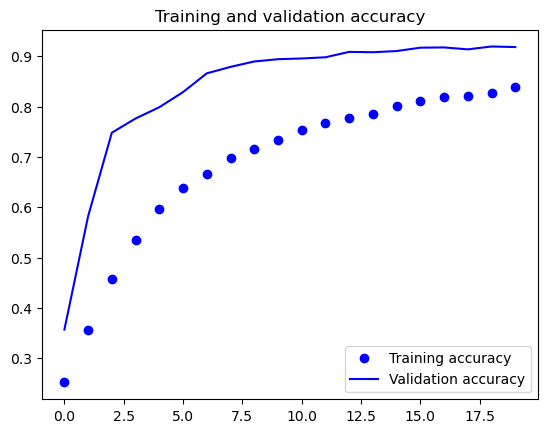

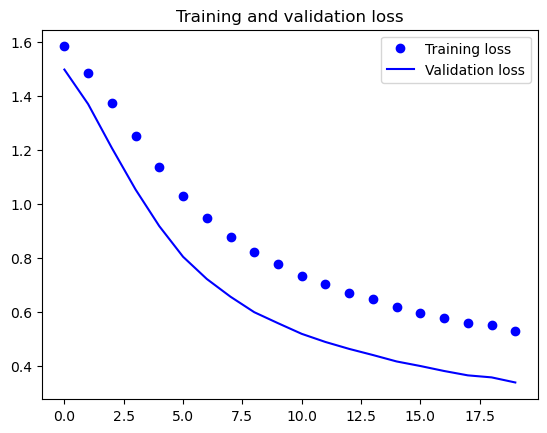

In [23]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes2 = sport_model.predict(test_X)

164/164 [==============================] - 0s 2ms/step


In [25]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [26]:
predicted_classes.shape, test_Y.shape

((5240,), (5240,))

# Muestras de entrenamiento

Found 4728 correct labels


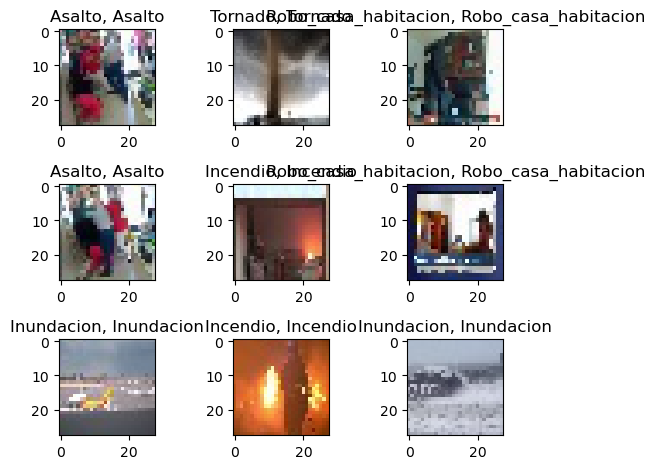

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none') #CAMBIAR
    plt.title("{}, {}".format(situaciones[predicted_classes[correct]],
                                                    situaciones[test_Y[correct]]))

    plt.tight_layout()

Found 512 incorrect labels


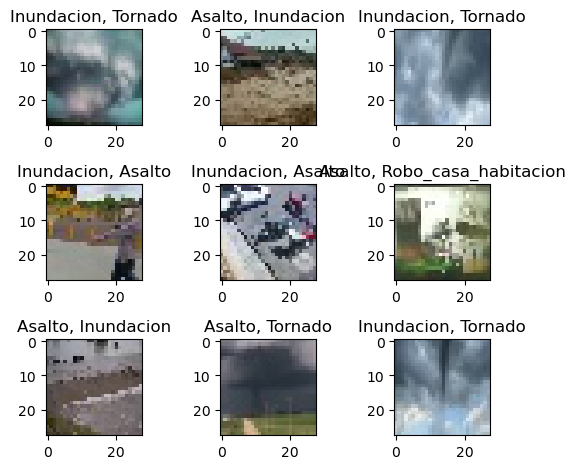

In [28]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')  #CAMBIAR
    plt.title("{}, {}".format(situaciones[predicted_classes[incorrect]],
                                                    situaciones[test_Y[incorrect]]))
    plt.tight_layout()

In [29]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.85      1014
     Class 1       0.99      1.00      1.00      1038
     Class 2       0.79      0.88      0.83      1049
     Class 3       0.95      0.88      0.91      1086
     Class 4       0.97      0.88      0.92      1053

    accuracy                           0.90      5240
   macro avg       0.91      0.90      0.90      5240
weighted avg       0.91      0.90      0.90      5240



# Pruebas con nuevas imágenes

In [30]:
#from skimage.transform import resize

#images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
#filenames = ['./imagenes_prueba/situaciones_de_riesgo/Incendio']

#for filepath in filenames:
#    image = plt.imread(filepath,0)
#    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR
#    images.append(image_resized)

#X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
#test_X = X.astype('float32')
#test_X = test_X / 255.

#predicted_classes = sport_model.predict(test_X)

#for i, img_tagged in enumerate(predicted_classes):
#    print(filenames[i], situaciones[img_tagged.tolist().index(max(img_tagged))])

1/1 [==============================] - 0s 31ms/step


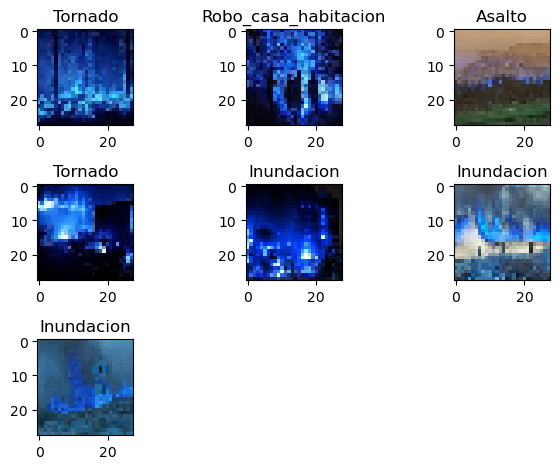

In [40]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Incendio'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar 
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)
test_X = images.astype('float32')
# Cargar el modelo
# sport_model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 31ms/step


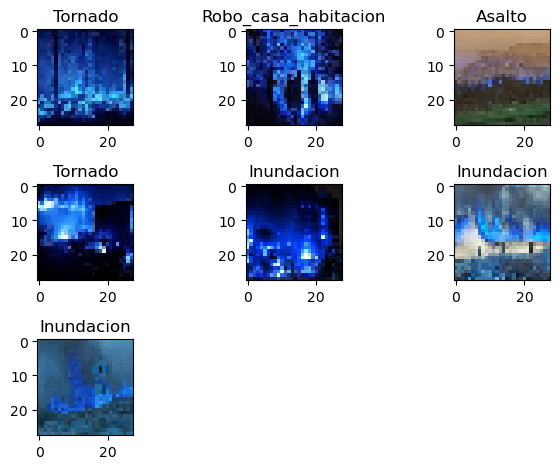

In [40]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Incendio'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar 
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)
test_X = images.astype('float32')
# Cargar el modelo
# sport_model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 118ms/step


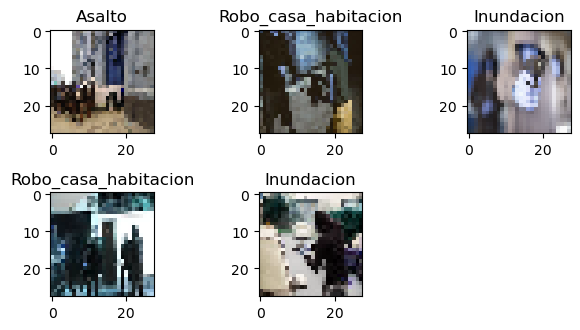

In [32]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Asalto'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 78ms/step


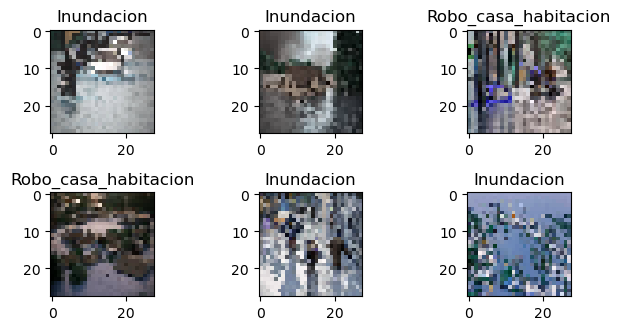

In [41]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Inundacion'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 64ms/step


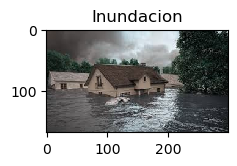

In [49]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Inundacion/caso1'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 49ms/step


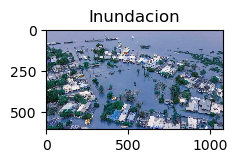

In [50]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Inundacion/caso2'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 48ms/step


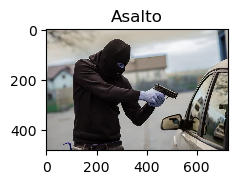

In [51]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Asalto/caso1'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 63ms/step


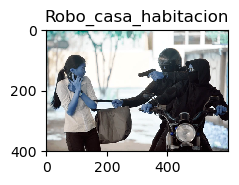

In [52]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Asalto/caso2'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 24ms/step


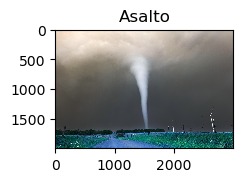

In [53]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Tornado/caso1'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 23ms/step


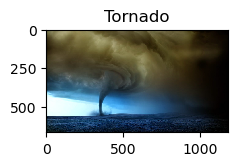

In [54]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Tornado/caso2'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 30ms/step


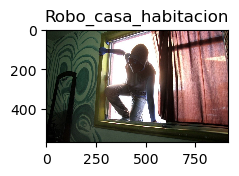

In [55]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Robo_casa_habitacion/caso1'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 31ms/step


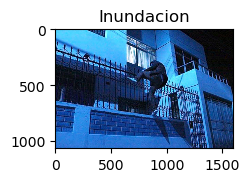

In [56]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Robo_casa_habitacion/caso2'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        imagen1= img
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagen1, cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 15ms/step


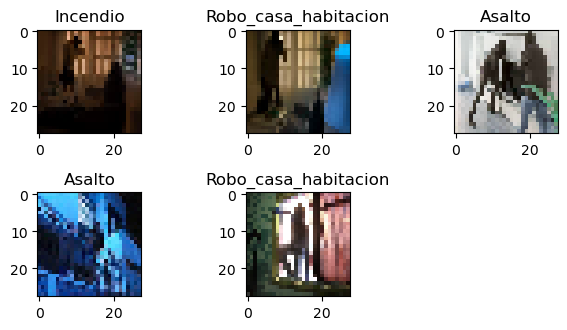

In [34]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Robo_casa_habitacion'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 16ms/step


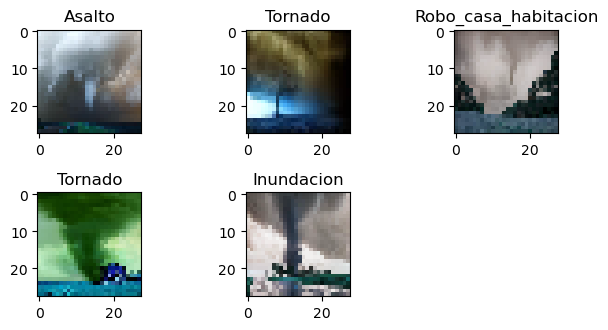

In [35]:

# Definir la ruta del directorio
dir_path = './imagenes_prueba/situaciones_de_riesgo/Tornado'

# Leer y preprocesar las imágenes
images = []
for filename in os.listdir(dir_path):
    img = cv2.imread(os.path.join(dir_path, filename))
    if img is not None:
        img = cv2.resize(img, (28, 28))  # Asegúrate de que este es el tamaño correcto para tu modelo
        img = img / 255.0  # Normalizar si tu modelo espera que las imágenes estén normalizadas
        images.append(img)

# Convertir la lista de imágenes en un numpy array
images = np.array(images)

# Cargar el modelo
# model = load_model('sport_model.h5')

# Predecir las clases de las imágenes
# predicted_classes = model.predict_classes(images)
predicted_probs = sport_model.predict(images)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Mostrar las imágenes y sus clases predichas
for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='none')
    plt.title("{}".format(situaciones[predicted_classes[i]]))
    plt.tight_layout()
plt.show()